# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [2]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [3]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [4]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [5]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [6]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [7]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [8]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [9]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [10]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [11]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [12]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position  Team  GF  GA Points
count         4     4   4   4      4
unique        4     4   3   4      4
top           4  Ajax  75  40     70
freq          1     1   2   1      1


In [13]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [14]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [15]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [16]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [17]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [18]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [19]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. To match scikit-learn nomenclature we explicitly define $\alpha$ as the regularisation hyperparameter instead of the commonly used $\lambda$ in literature.

C:\Users\20164798\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean squared error (test set): 5.52
Optimal value for alpha: 0.3727593720314938
The selected features are: ['PRSS3' 'GAL' 'CDH17' 'ABCB1' 'FN1' 'RARRES3' 'DUSP6' 'CYR61' 'FABP1'
 'CDX2' 'AKR1C3']


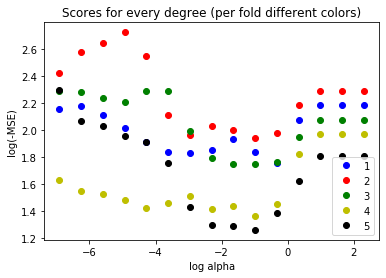

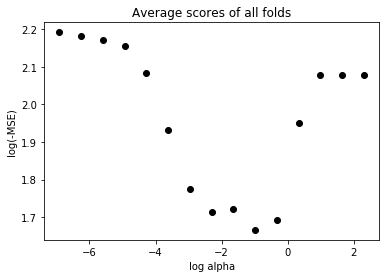

In [21]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Initialize (pseudo-) random number generator with a seed
# for reproducibility of results
np.random.seed(40)

def do_gridsearch_alpha(X_train, y_train, X_test, y_test, alphas, crossvals=5, plot=True):
    """
    given a train and a test dataset, fit and evaluate polynomial regression models with given degrees
    
    Parameters: 
        X_train: 2D (Datapoints x features) numpy array
            the datapoints on which to train the models
        y_train: 1D (Targets) numpy array
            the targets on which to train the models
        X_test: 2D (Datapoints x features) numpy array
            the datapoints on which to test the models
        y_test: 1D (Targets) numpy array
            the targets on which to test the models
        alphas: 1D numpy array
             alpha candidates
        crossvals: int
            amount of cross-validation folds
        plot: bool
            True for plotting the MSE scores, False for surpressing the plots
    
    returns: 
        a GridSearchCV object, containing the fitted models for every degree polynomial
    """
    # Define the functions for polynomial features and linear regression
    Lassoreg = Lasso(max_iter=10000, tol=0.001) # Increased tolerance to stop "ConvergenceWarning"
    scaler = StandardScaler()

    # Define the pipeline, containing the polynomial transformation and the subsequent linear regression
    model = Pipeline([
                     ("scaler", scaler),
                     ("lasso", Lassoreg)
                    ])

    # Define the hyperparameters for the Grid Search
    params = {'lasso__alpha': alphas}

    # Define a custom scoring system to evaluate the mean squared error (lower is better)
    mse = make_scorer(mean_squared_error,greater_is_better=False)

    # Define the Grid Search method
    gridsearch = GridSearchCV(model, params, scoring=mse, cv=crossvals)

    # Run Grid Search
    gridsearch.fit(X_train, y_train)
    
    # Predict targets for test set
    y_pred = gridsearch.predict(X_test)
    
    # Calculate MSE of the predictions on the test set
    MSE_test_set = mean_squared_error(y_test, y_pred)
    print(f'Mean squared error (test set): {MSE_test_set:.4}')
    
    if plot:
        # Plot MSE scores
        plt.figure()
        plt.title('Scores for every degree (per fold different colors)')
        colors = ['b.', 'r.', 'g.', 'y.', 'k.', 'c.']
        for i in range(crossvals):
            q = gridsearch.cv_results_[f'split{i}_test_score']
            plt.plot(np.log(params['lasso__alpha']), np.log(-q), colors[i % len(colors)], markersize=12)

        plt.xlabel('log alpha')
        plt.ylabel('log(-MSE)')
        plt.legend(list(range(1,crossvals+1)))

        # Plot average MSE scores
        plt.figure()
        #plt.errorbar(np.log(params['lasso__alpha']), np.log(-gridsearch.cv_results_[f'mean_test_score']), np.log(gridsearch.cv_results_[f'std_test_score']), linestyle='None', marker='.',markersize=12)
        plt.plot(np.log(params['lasso__alpha']), np.log(-gridsearch.cv_results_[f'mean_test_score']), 'k.', markersize=12)
        plt.title('Average scores of all folds')
        plt.xlabel('log alpha')
        plt.ylabel('log(-MSE)');
    return gridsearch

# Load data from CSV-files
gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response)

# Define value range for alpha (optimal value to be found using Grid Search)
alphaspace = np.logspace(-3, 1, num=15)

# Find optimal value for alpha using Grid Search
grids = do_gridsearch_alpha(X_train, y_train, X_test, y_test, alphaspace, 5)
alphamin = grids.best_params_['lasso__alpha']
print(f"Optimal value for alpha: {alphamin}")


feature_index = np.nonzero(grids.best_estimator_.named_steps['lasso'].coef_)
print(f"The selected features are: {gene_expression.columns.values[feature_index]}")


## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>

***ANSWER:***

Partitioning in training and validation do play a role in selection of alpha as we can see in the different cross validation runs above. For different partitions (colors), the least MSE is achieved with a different value for alpha. Without bootstrapping, one of these partitions would have been selected, changing the selected alpha. Following a change in alpha due to partitioning, the amount of features (and which specific features) that are selected will change as well, with a higher alpha leading to less selected features. Different train test splits can be shown to lead to different selected features as well by disabling the random seed in the above function, and running the code a few times. This can be seen to lead to different selected features.

The intercept should be seperate, as the intercept is merely a correction of the mean in a complex feature space and thus not relate to whether a feature has high enough impact and robustness to be taken into account in the final model. Also:
    
$$
\hat{\beta}^{\text {lasso }}=\underset{\beta}{\operatorname{argmin}}\left\{\sum_{i=1}^{N}\left(y_{i}-\beta_{0}-\sum_{j=1}^{p} x_{i j} \beta_{j}\right)^{2}+\alpha \sum_{j=1}^{p}\left|\beta_{j}\right|\right\}
$$

and:
$$
\hat{\beta}^{\text {ridge }}=\underset{\beta}{\operatorname{argmin}}\left\{\sum_{i=1}^{N}\left(y_{i}-\beta_{0}-\sum_{j=1}^{p} x_{i j} \beta_{j}\right)^{2}+\alpha \sum_{j=1}^{p} \beta_{j}^{2}\right\}
$$

Intercept $\beta_0$ is, for both ridge and lasso, outside the penalty term. So, the intercept is never shrunk to zero.

In [22]:
# Find the resulting coefficients for the best estimator (best alpha) -->
# Effect of training and val sets: rerun and check if below func is different
grids.best_estimator_.steps[1][1].coef_
# As we can see Lasso automatically seperates the intercept from the Regularization --> It is and should not be included
grids.best_estimator_.steps[1][1].intercept_

array([-2.48306306])

## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>

<!--
***ANSWER:***  <font color='red'> Nog een keuze maken voor manier van bias berekenen (hieronder), ook nog tekst aanpassen van bias </font>

<font color='red'>Below we implemented a procedure where the data is resampled for set amount `n_bootstrap_runs` times. The data is split into testing and training data every run. For every $\alpha$ in `alphaspace` a model was fitted on the training set and evaluated on the test set. For each run and $\alpha$ we keep track of the following quantities:

<font color='red'>1. The mean squared error (MSE) of the test predictions
<font color='red'>2. The lasso regression coefficients
<font color='red'>3. The variance of the test predictions

<font color='red'>Underneath the implementation we visualize the obtained quantities and discuss the effect of (L1-) regularisation on the parameter estimates. 

<font color='#FF0000'>Troy: Ik heb het nu zonder grid search gedaan. GridSearchCV heeft geen ondersteuning voor het retrieven van alle model coëfficiënten, alleen van de beste. Vorig jaar heb ik dit opgelost door een clone van GridSearchCV te maken en die zelf aan te passen (uiteraard in eigen code). Nu bedenk ik me wel dat GridSearch misschien helemaal niet nodig, aangezien er verder niet gevraagd wordt cross-validation toe te passen.</font>

<font color='red'>**Vincent**: Waarom precies de opbouw van die "bootstrap_test_train_split"-functie? Daarnaast: de vraag is "Show the effect of the regularization on the parameter estimates in terms of bias and variance". Het enige wat we nu hebben is variance tov $\alpha$, maar we hebben niets qua bias (en wel MSE). Omdat $
\operatorname{MSE}(\hat{\theta}) = \operatorname{Var_\theta}\left(\hat{\theta}\right) +\operatorname{Bias}_{\theta}\left(\hat{\theta}\right)^{2}
$, kunnen we dan niet de bias op die manier uitrekenen?

-->

In [25]:
from sklearn.base import clone
from sklearn.model_selection import ParameterGrid
from sklearn.utils import resample

from mlxtend.evaluate import bias_variance_decomp

def bootstrap_test_train_split(X, y, n_runs, random_state = 0):
    """
    A generator that samples X, y with replacement (used in bootstrapping) and splits
    it into a test and train dataset.
    
    Parameters: 
        X: 2D (Datapoints x features) array or dataframe
            the datapoints on which to train the models
        y: 1D (Targets) array or dataframe
            the targets on which to train the models
        n_runs: int
            amount of times the data is resampled
        random_state: int
            random state of random number generators
            
    yiels: 
        X and y resampled and split into a train and test set according: 
        X_train, X_test, y_train, y_test
    """
    for i in range(n_runs):
        # Bootstrapping is sampling WITH replacement
        Xsampled, ysampled = resample(X, y, random_state=random_state+i, replace=True)

        yield train_test_split(Xsampled, ysampled, shuffle=False)

        
# Load data from CSV files
gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

# Define values for alpha and set bootstrap options
alphaspace = np.logspace(-5, 2, num=20)
n_bootstrap_runs = 100

# Define empty arrays to store results in
MSEs = np.zeros((n_bootstrap_runs, alphaspace.shape[0]))
MSEs_train = np.zeros((n_bootstrap_runs, alphaspace.shape[0]))
coefs = np.zeros((n_bootstrap_runs, alphaspace.shape[0], gene_expression.shape[1]))

# Select training and test set using bootstrap function
for i, (X_train, X_test, y_train, y_test) in \
                    enumerate(bootstrap_test_train_split(gene_expression, drug_response, n_bootstrap_runs,40)):
    
    # Define Lasso regression method and scaling method
    Lassoreg = Lasso(max_iter=2000, tol=0.003)
    scaler = StandardScaler()

    # Define the pipeline
    model = Pipeline([
                     ("scaler", scaler),
                     ("lasso", Lassoreg)
                    ])
    
    # Define parameters (values for alpha) 
    params = {'lasso__alpha': alphaspace}
    
    # Loop over all values for alpha
    for j, param in enumerate(ParameterGrid(params)): 
        
        # Clone model (to be able to use variable 'model' again, set value for alpha and fit model to training data 
        model_ = clone(model)
        model_.set_params(**param)
        model_.fit(X_train, y_train)
        
        # Evaluate model, calculate MSE, standard deviation and bias
        y_pred_train = model_.predict(X_train)
        y_pred = model_.predict(X_test)
        
        MSEs[i, j] = mean_squared_error(y_test, y_pred)
        MSEs_train[i, j] = mean_squared_error(y_train, y_pred_train)
        coefs[i, j, ...] = model_.named_steps['lasso'].coef_


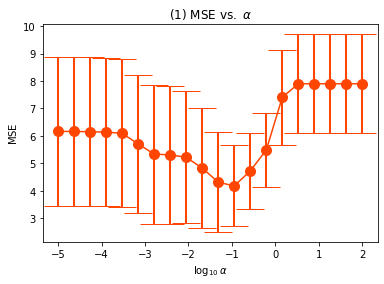

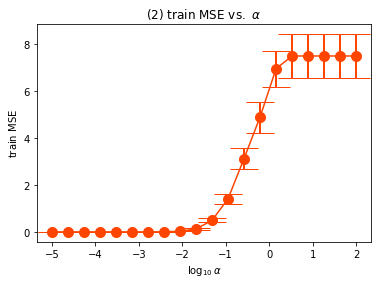

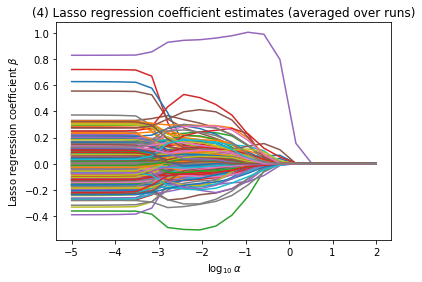

In [32]:
# Figure 1: Mean Squared Error (MSE) for different values of alpha 
plt.figure()
plt.errorbar(np.log10(alphaspace), np.mean(MSEs, axis=0), yerr=np.std(MSEs, axis=0),
            elinewidth=2, fmt='o-', markersize=10, capsize=14, color='orangered')
plt.xlabel('$\\mathrm{log}_{10}\\,\\alpha$')
plt.ylabel('$\\mathrm{MSE}$')
plt.title('(1) $\\mathrm{MSE}$ $\mathrm{vs.}$ $\\alpha$')
plt.show()

# Figure 2: Training Mean Squared Error (MSE) for different values of alpha 
plt.figure()
plt.errorbar(np.log10(alphaspace), np.mean(MSEs_train, axis=0), yerr=np.std(MSEs_train, axis=0),
            elinewidth=2, fmt='o-', markersize=10, capsize=14, color='orangered')
plt.xlabel('$\\mathrm{log}_{10}\\,\\alpha$')
plt.ylabel('train $\\mathrm{MSE}$')
plt.title('(2) train $\\mathrm{MSE}$ $\mathrm{vs.}$ $\\alpha$')
plt.show()

# Figure 3: Beta coefficient for different values of alpha
plt.figure()
for i in range(gene_expression.shape[1]):
    plt.plot(np.log10(alphaspace), np.mean(coefs[:, :, i], axis=0))
plt.xlabel('$\\mathrm{log}_{10}\\,\\alpha$')
plt.ylabel('Lasso regression coefficient $\\beta$')
plt.title('(4) Lasso regression coefficient estimates (averaged over runs)')
plt.show()





***ANSWER:*** In figure 1 (above) it can be seen that there is an optimal value for $\alpha$. This can be explained following the feature selection of the Lasso regression. An increase in $\alpha$ causes more feature weights to go to zero, thus reducing the model complexity. This leads to a higher bias, since the model can not fully describe the data anymore. On the contrary, an increase in $\alpha$ can be seen to correspond to a decrease in variance. The higher $\alpha$-coefficient pushes the feature weights closer to 0, decreasing the deviation. The model complexity at this optimal $\alpha$ is still high enough to accurately describe the data due to a lower bias, while it is also low enough to get accurate estimates on the features due to a lower variance.

The increase in bias is also visualized in figure 2, which shows the train MSE. With an increasing $\alpha$, the train MSE goes up. This shows that the model can't accurately describe the training data, due to the decreased model complexity. Before reaching the optimum $\alpha$, the bias is increasing, while the test MSE is still decreasing. From $MSE = bias(\hat{\theta})^2 + Var(\hat{\theta})$, it can be concluded that the variance is also decreasing. 


<!--
<font color='red'>In the cell below, the MSE on the test set is plotted against the  including standard deviation (visualized by vertical errorbars) against $\alpha$ over a space of 20 points between $10^{-5}$ and $10^2$ (Figure 1). As the $\alpha$-coefficient increases, more regression coefficients are pushed towards zero. Effectively, as $\alpha$ increases the bias is increased and variance decreased.  For reference we include a plot (Figure 2) of an estimate of the variance (or rather standard deviation) and we observe that from ~$10^{-2}$ the variance decreases (up to a point where it becomes zero). With this large increase comes just a modest increase in MSE. And as the MSE is effectively the sum of variance and the squared bias, we deduce that the bias must be increasing. Thus here we can see clearly that the theory of the bias-variance tradeoff holds true for a lasso regression model (on this particular dataset). </font>

<font color='red'>If we dive into specifics as to why the bias increases as alpha increases, we take a glance at the regularisation component of the objective function for lasso regression: 

<font color='red'>$
\begin{align*}
\alpha \sum_{i=1}^p |\beta_i|
\end{align*}
$

<font color='red'>Due to the $L_1$-norm, coefficients are pushed to zero if $\alpha$ increases. We can visualize this (Figure 3) by plotting the lasso regression coefficient estimates against $\alpha$ (averaged over the bootstrap runs). 

<font color='red'>It can be observed nicely from the figure that the lasso regression coefficients are pushed towards zero as $\alpha$ increases, up to a point where the coefficients all become zero. Naturally this will lead to zero variance of the model predictions, as the model will be of the form $\hat{y}=\beta_0$, where $\beta_0$ is the bias term. </font>

<font color='red'>**Vincent:** Is dit stuk relevant?</font>
-->

## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>

***ANSWER:***

The objective function $\mathcal{L}$ of logistic regression can be characterized by:
\begin{align*}
\mathcal{L}(\mathbf{\beta})=\sum_{i=1}^{N} [y_i(\beta_0 + \beta^T x_i) - \log(1+e^{(\beta_0+\beta^T x_i)}]
\end{align*}

The $L_1$ and $L_2$ regularisation terms can be added to the objective function:

\begin{align*}
\mathcal{L}(\mathbf{\beta})=\sum_{i=1}^{N} [y_i(\beta_0 + \beta^T x_i) - \log(1+e^{(\beta_0+\beta^T x_i)}] - \sum_{j=1}^{p} \left(\alpha_1\beta_j^2 + \alpha_2 |\beta_j|\right)
\end{align*}


Here $\alpha_1$, $\alpha_2$ are the regularisation parameters for $L_1$ and $L_2$ regularisation respectively. Alternatively, a trade-off parameter $V \in [0, 1]$ can be introduced:

\begin{align*}
\mathcal{L}(\mathbf{\beta})=\sum_{i=1}^{N} [y_i(\beta_0 + \beta^T x_i) - \log(1+e^{(\beta_0+\beta^T x_i)}] - \alpha  \sum_{j=1}^{p} (V\beta_j^2 + (1-V) |\beta_j|)
\end{align*}

When $V=0$, Lasso regulatisation is used; when $V=1$, Ridge regularisation is used.